In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#for scaling          
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# for split train and test
from sklearn.model_selection import train_test_split
# for model building logistic regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,root_mean_squared_error

In [ ]:
#Task 1: Data Cleaning

#Perform the necessary data cleaning steps to convert messy, unclean data into clean data.

In [3]:
df=pd.read_csv(r"C:\Users\91994\Desktop\Sprint data\Course 9\DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv",delimiter=';')

In [3]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [4]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [5]:
df.duplicated().sum()

34

In [6]:
# Droping duplicate rows
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               706 non-null    int64  
 1   Reason for absence               706 non-null    int64  
 2   Month of absence                 706 non-null    int64  
 3   Day of the week                  706 non-null    int64  
 4   Seasons                          706 non-null    int64  
 5   Transportation expense           706 non-null    int64  
 6   Distance from Residence to Work  706 non-null    int64  
 7   Service time                     706 non-null    int64  
 8   Age                              706 non-null    int64  
 9   Work load Average/day            706 non-null    float64
 10  Hit target                       706 non-null    int64  
 11  Disciplinary failure             706 non-null    int64  
 12  Education                  

In [10]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,18.192635,18.882436,6.410765,3.890935,2.549575,222.977337,29.297450,12.495751,36.478754,272.089984,...,0.056657,1.291785,1.060907,0.565156,0.076487,0.769122,79.005666,172.202550,26.635977,7.143059
std,10.927472,8.482877,3.404811,1.425503,1.121527,67.293426,14.706661,4.370190,6.563404,39.458780,...,0.231350,0.671499,1.104717,0.496088,0.265965,1.333351,12.862501,6.159814,4.254901,13.608120
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,10.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.604000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,171.000000,25.000000,3.000000
75%,28.000000,26.000000,9.750000,5.000000,4.000000,260.000000,49.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [41]:
#performing otlier
def outliers(df):
    for col in df.select_dtypes(include=['number']).columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        IQR=q3-q1
        LF=q1-1.5*IQR
        UF=q3+1.5*IQR
        outlier=df[(df[col]<LF) | (df[col]>UF)]
    return outlier

# call
alloutlier=outliers(df)
alloutlier

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
22,10,13,8,2,1,361,52,3,28,205.917,...,0,1,1,1,0,4,80,172,27,40
49,15,14,9,2,4,291,31,12,40,241.476,...,0,1,1,1,0,1,73,171,25,32
85,14,10,11,2,4,155,12,14,34,306.345,...,0,1,2,1,0,0,95,196,25,32
87,15,14,11,2,4,291,31,12,40,306.345,...,0,1,1,1,0,1,73,171,25,40
96,11,7,11,4,4,289,36,13,33,306.345,...,0,1,2,1,0,1,90,172,30,24
99,34,19,12,3,4,118,10,10,37,261.306,...,0,1,0,0,0,0,83,172,28,64
104,34,19,12,3,4,118,10,10,37,261.306,...,0,1,0,0,0,0,83,172,28,56
163,20,13,3,6,2,260,50,11,36,343.253,...,0,1,4,1,0,0,65,168,23,40
164,17,11,3,2,2,179,22,17,40,343.253,...,0,2,2,0,1,0,63,170,22,40


In [42]:
# Removed outliers for all the columns:
def remove_outliers(df):
    for col in df.select_dtypes(include=['number']).columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        IQR=q3-q1
        LF=q1-1.5*IQR
        UF=q3+1.5*IQR
        outlier_removal=df[(df[col]<=LF) & (df[col]>=UF)]
    return outlier_removal
alloutlier=remove_outliers(df)
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [ ]:
#Task 2: Understanding Absenteeism Patterns

#How does absenteeism vary across different employee demographics (age, education level, son, reason for absence etc.) and work characteristics (disciplinary failure, hit target, etc.)?

#Perform descriptive analysis to find the answer to the above question.

In [44]:
# 1. Overall absenteeism summary
df['Absenteeism time in hours'].describe()

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64

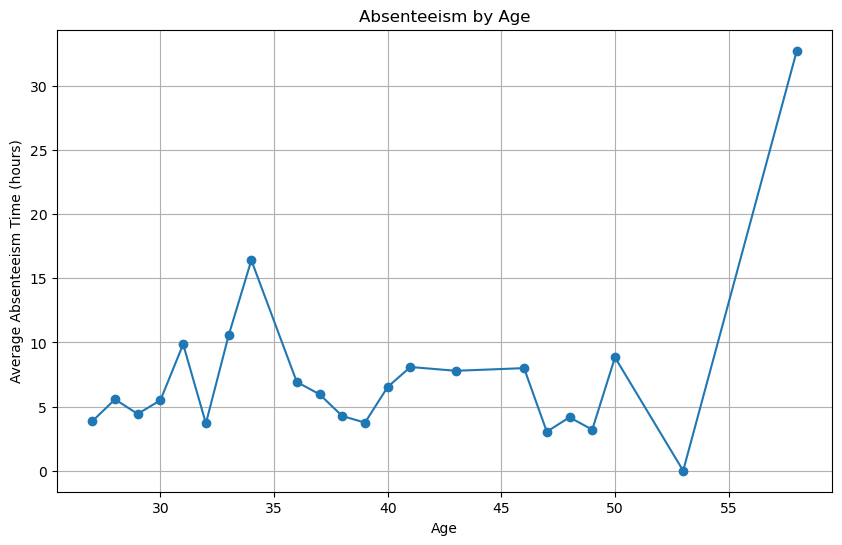

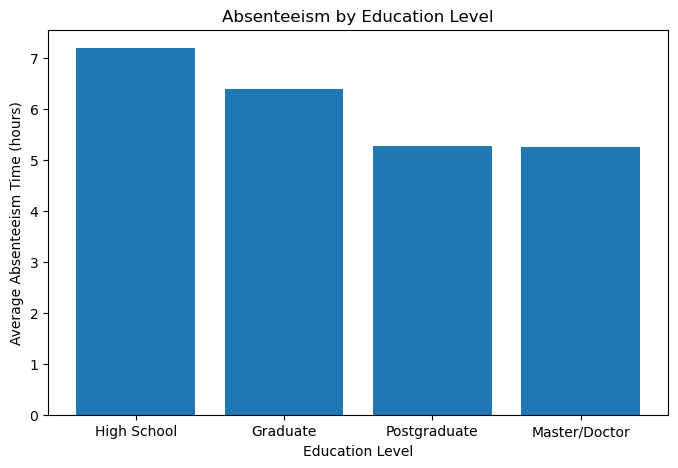

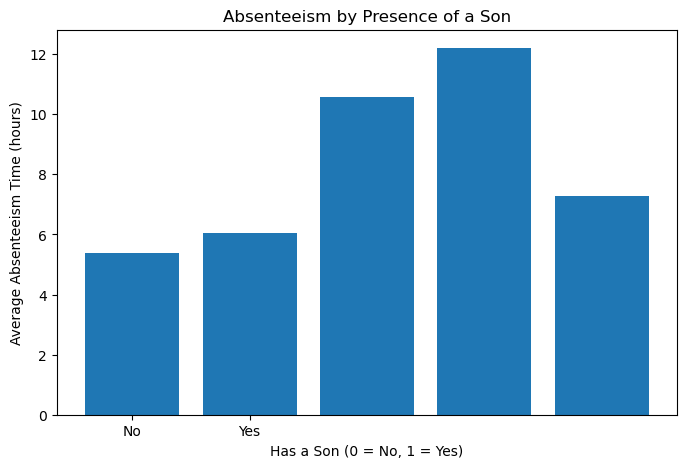

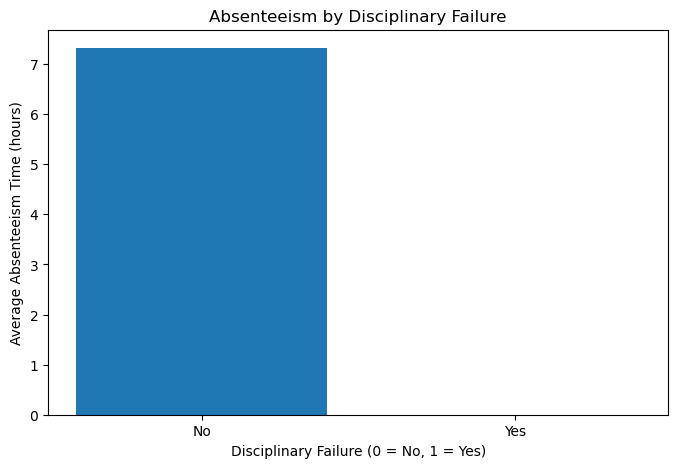

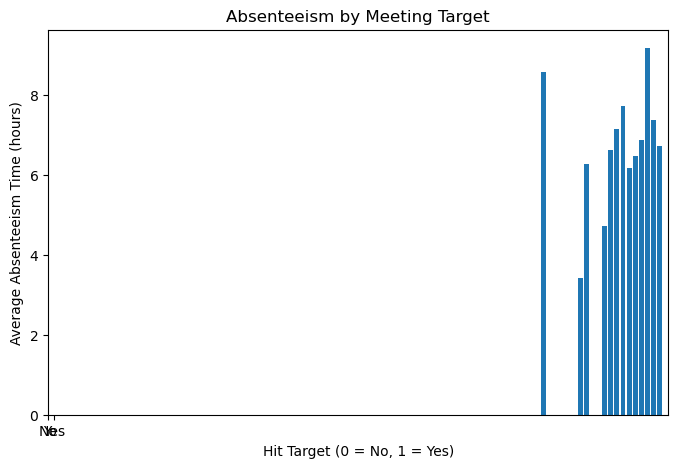

In [45]:
# 2. Absenteeism by Age
age_group_absenteeism = df.groupby('Age')['Absenteeism time in hours'].mean().reset_index()

# Plot absenteeism by Age
plt.figure(figsize=(10, 6))
plt.plot(age_group_absenteeism['Age'], age_group_absenteeism['Absenteeism time in hours'], marker='o')
plt.title('Absenteeism by Age')
plt.xlabel('Age')
plt.ylabel('Average Absenteeism Time (hours)')
plt.grid(True)
plt.show()

# 3. Absenteeism by Education
education_group_absenteeism = df.groupby('Education')['Absenteeism time in hours'].mean().reset_index()

# Bar plot for absenteeism by Education
plt.figure(figsize=(8, 5))
plt.bar(education_group_absenteeism['Education'], education_group_absenteeism['Absenteeism time in hours'])
plt.title('Absenteeism by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Absenteeism Time (hours)')
plt.xticks([1, 2, 3, 4], ['High School', 'Graduate', 'Postgraduate', 'Master/Doctor'])
plt.show()

# 4. Absenteeism by Son (Has a Son vs No Son)
son_group_absenteeism = df.groupby('Son')['Absenteeism time in hours'].mean().reset_index()

# Bar plot for absenteeism by Son
plt.figure(figsize=(8, 5))
plt.bar(son_group_absenteeism['Son'], son_group_absenteeism['Absenteeism time in hours'])
plt.title('Absenteeism by Presence of a Son')
plt.xlabel('Has a Son (0 = No, 1 = Yes)')
plt.ylabel('Average Absenteeism Time (hours)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 5. Absenteeism by Reason for Absence
reason_group_absenteeism = df.groupby('Reason for absence')['Absenteeism time in hours'].mean().reset_index()

# 6. Absenteeism by Disciplinary Failure
disciplinary_group_absenteeism = df.groupby('Disciplinary failure')['Absenteeism time in hours'].mean().reset_index()

# Bar plot for absenteeism by Disciplinary Failure
plt.figure(figsize=(8, 5))
plt.bar(disciplinary_group_absenteeism['Disciplinary failure'], disciplinary_group_absenteeism['Absenteeism time in hours'])
plt.title('Absenteeism by Disciplinary Failure')
plt.xlabel('Disciplinary Failure (0 = No, 1 = Yes)')
plt.ylabel('Average Absenteeism Time (hours)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 7. Absenteeism by Hit Target
hit_target_group_absenteeism = df.groupby('Hit target')['Absenteeism time in hours'].mean().reset_index()

# Bar plot for absenteeism by Hit Target
plt.figure(figsize=(8, 5))
plt.bar(hit_target_group_absenteeism['Hit target'], hit_target_group_absenteeism['Absenteeism time in hours'])
plt.title('Absenteeism by Meeting Target')
plt.xlabel('Hit Target (0 = No, 1 = Yes)')
plt.ylabel('Average Absenteeism Time (hours)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [ ]:
#Task - 3: Analyzing Reasons for Absenteeism

#What are the most frequent reasons for employee absence? Are there any pattern in these reasons?

#Perform descriptive analysis to find the answer to the above question.

In [46]:
# 1. Overall Frequency of Reasons for Absence
reason_counts = df['Reason for absence'].value_counts().reset_index()
reason_counts.columns = ['Reason for Absence', 'Frequency']

In [47]:
print(reason_counts)

    Reason for Absence  Frequency
0                   23        149
1                   28        112
2                   27         69
3                   13         55
4                    0         43
5                   19         40
6                   22         38
7                   26         33
8                   25         31
9                   11         26
10                  10         25
11                  18         21
12                  14         19
13                   1         16
14                   7         15
15                   6          8
16                  12          8
17                  21          6
18                   8          6
19                   9          4
20                   5          3
21                  16          3
22                  24          3
23                  15          2
24                   4          2
25                   3          1
26                   2          1
27                  17          1


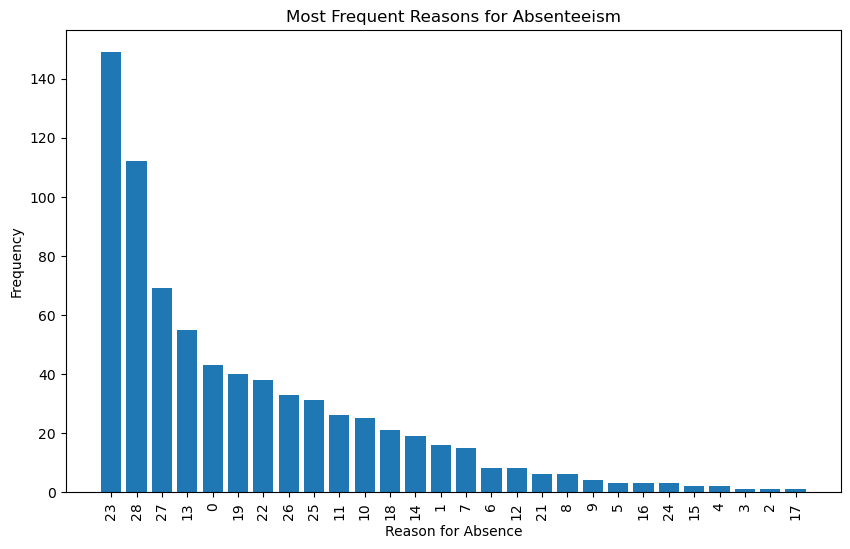

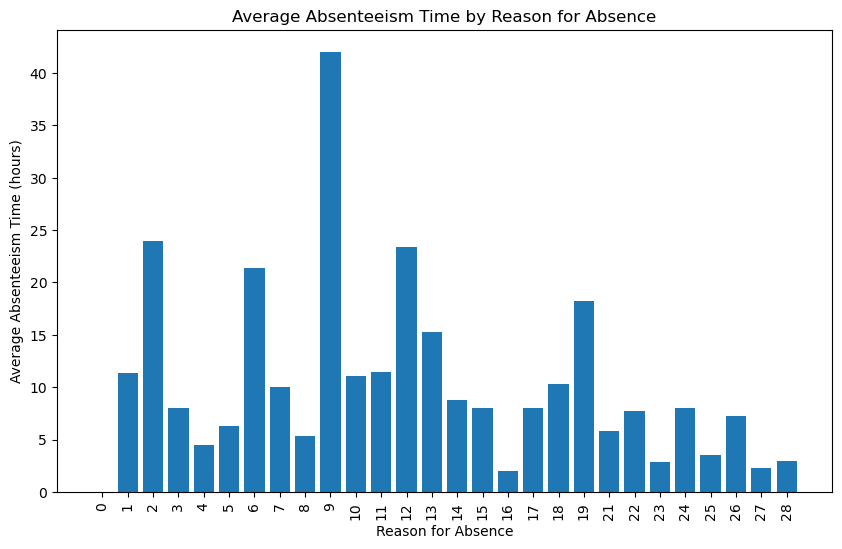

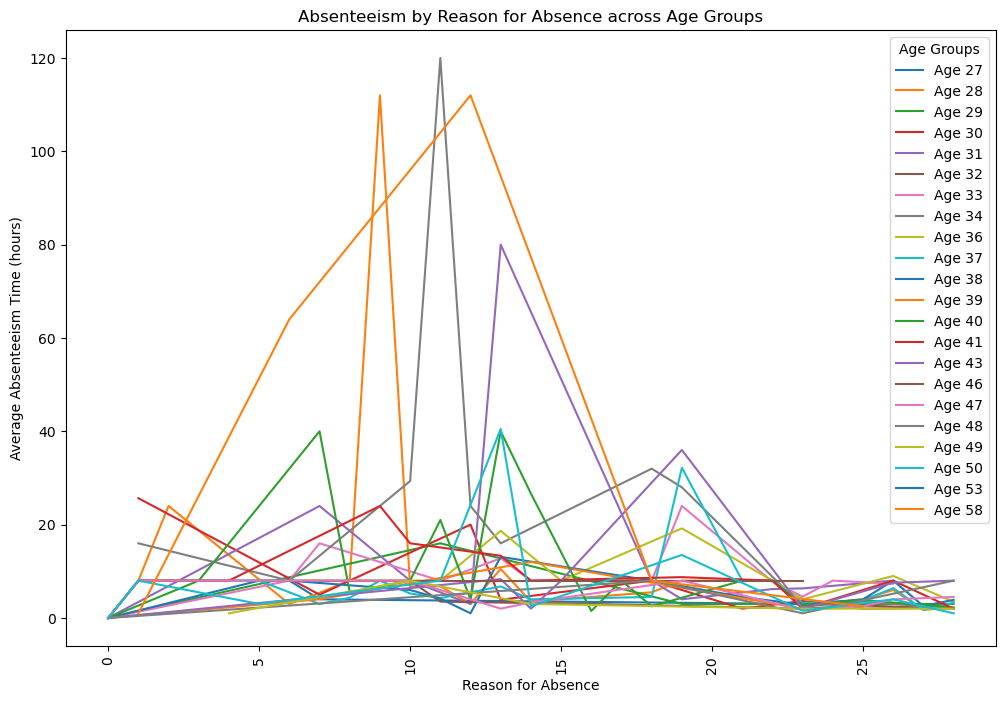

In [48]:
# 2. Plot the most frequent reasons for absenteeism
plt.figure(figsize=(10, 6))
plt.bar(reason_counts['Reason for Absence'].astype(str), reason_counts['Frequency'])
plt.title('Most Frequent Reasons for Absenteeism')
plt.xlabel('Reason for Absence')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# 3. Absenteeism by Reason for Absence
reason_group_absenteeism = df.groupby('Reason for absence')['Absenteeism time in hours'].mean().reset_index()

# Plot absenteeism time by reason for absence
plt.figure(figsize=(10, 6))
plt.bar(reason_group_absenteeism['Reason for absence'].astype(str), reason_group_absenteeism['Absenteeism time in hours'])
plt.title('Average Absenteeism Time by Reason for Absence')
plt.xlabel('Reason for Absence')
plt.ylabel('Average Absenteeism Time (hours)')
plt.xticks(rotation=90)
plt.show()

# 4. Absenteeism by Reason for Absence for Different Demographics 
age_reason_absenteeism = df.groupby(['Age', 'Reason for absence'])['Absenteeism time in hours'].mean().reset_index()

# Plot absenteeism by age and reason for absence
plt.figure(figsize=(12, 8))
for age in age_reason_absenteeism['Age'].unique():
    subset = age_reason_absenteeism[age_reason_absenteeism['Age'] == age]
    plt.plot(subset['Reason for absence'], subset['Absenteeism time in hours'], label=f'Age {age}')

plt.title('Absenteeism by Reason for Absence across Age Groups')
plt.xlabel('Reason for Absence')
plt.ylabel('Average Absenteeism Time (hours)')
plt.xticks(rotation=90)
plt.legend(title='Age Groups')
plt.show()

In [ ]:
#Task - 4: Predicting Absenteeism Duration

#Can we predict the duration of an employee's absence based on factors like reason for absence, disciplinary failure distance from residence to work, obesity, etc.?

#Perform predictive analysis to forecast the duration of an employee's absence based on various factors mentioned above.

In [53]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [4]:
# Feature selection: Choose relevant features
features = [ 'Son', 'Social drinker','Social drinker','Age','Transportation expense']
X = df[features]
y = df['Absenteeism time in hours']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 2. Scaling features (Optional but recommended for some models like linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Model Training - Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predict using the trained model
pred = linear_model.predict(X_test_scaled)

# 4. Model Evaluation - Linear Regression
print("Linear Regression Model Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, pred))
print("R-squared (R2):", r2_score(y_test, pred))

# 5. Model Training - Random Forest Regressor (Alternative Model)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 5.489120977457556
R-squared (R2): 0.017990421493036646


RandomForestRegressor(random_state=42)